In [1]:
import pandas as pd

In [2]:
url = "flight_data.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
import numpy as np

## Drop Nan Values

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#you cannot replace nan with mean values as "symboling" contains'+' and '-',so covert nan to 0.

In [9]:
df= df.replace(np.nan,0)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
#df['stroke']= df['stroke'].astype('float64')

In [12]:
#df['stroke'].dtypes

In [13]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

#### date_of_journey is in object type, so w need to conert it into timestamp 

In [15]:
#we require pandas "to_datetime" to convert obj datatype to datetime dtype

In [16]:
# .dt.day method will extract only day of that date
# .dt.month  method will extract only month of that date

In [17]:
df["journey_day"] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [18]:
df["journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [19]:
df.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [22]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [23]:
df['Route'].value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? IXB ? DEL ? BLR       1
BLR ? BOM ? IXC ? DEL       1
CCU ? IXA ? BLR             1
BOM ? GOI ? HYD             1
0                           1
Name: Route, Length: 129, dtype: int64

In [24]:
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:45      1
21:35      1
04:15      1
03:00      1
01:35      1
Name: Dep_Time, Length: 222, dtype: int64

#### we'll use here (.dt.hour) and (.dt.minute)

In [25]:
df["dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [26]:
df["dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [27]:
df.drop(["Dep_Time"],axis=1, inplace = True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [29]:
df['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:50 10 Jun      1
00:50 16 Apr      1
01:00 25 Apr      1
21:20 13 Mar      1
02:45 19 Apr      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [30]:
df["arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

In [31]:
df["arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [32]:
df.drop(["Arrival_Time"],axis=1, inplace= True)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [34]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 10m      1
13h 35m      1
5m           1
47h          1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [35]:
#df['Duration'] = df['Duration'].str.replace("h",":")
#df['Duration'] = df['Duration'].str.replace("m",'')

In [36]:
#df["duration"]= (df["arrival_hour"]+df["arrival_minute"])-(df["dep_hour"]+df["dep_min"])

In [37]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
dduration = list(df["Duration"])

for i in range(len(dduration)):
    if len(dduration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dduration[i]:
            dduration[i] = dduration[i].strip() + " 0m"   # Adds 0 minute
        else:
            dduration[i] = "0h " + dduration[i]           # Adds 0 hour

dduration_hours = []
dduration_mins = []
for i in range(len(dduration)):
    dduration_hours.append(int(dduration[i].split(sep = "h")[0]))    # Extract hours from duration
    dduration_mins.append(int(dduration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [38]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["duration_hours"] = dduration_hours
df["duration_mins"] = dduration_mins

In [39]:
df= df.drop(['Duration'], axis = 1)

In [40]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [41]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
0              1
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
df['Total_Stops'] = df['Total_Stops'].replace("1 stop","1")
df['Total_Stops'] = df['Total_Stops'].replace("2 stops","2")
df['Total_Stops'] = df['Total_Stops'].replace("3 stops","3")
df['Total_Stops'] = df['Total_Stops'].replace("4 stops","4")
df['Total_Stops'] = df['Total_Stops'].replace("non-stop","0")

In [43]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [44]:
df.drop(["Additional_Info" , "Route"],axis = 1, inplace=True)

In [45]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  object
 4   Price           10683 non-null  int64 
 5   journey_day     10683 non-null  int64 
 6   journey_month   10683 non-null  int64 
 7   dep_hour        10683 non-null  int64 
 8   dep_min         10683 non-null  int64 
 9   arrival_hour    10683 non-null  int64 
 10  arrival_minute  10683 non-null  int64 
 11  duration_hours  10683 non-null  int64 
 12  duration_mins   10683 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Categorical to numerical Transformation

### 1. Using Pandas---OneHotEncoder

In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

dfone1 = df[["Airline"]]

dfone1 = pd.get_dummies(dfone1, drop_first= True)
df = pd.concat([df,dfone1], axis = 1)
df = df.drop(['Airline'],axis = 1)

df.head()

,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,0,3897,24,3,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,2,7662,1,5,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,2,13882,9,6,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,1,6218,12,5,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,1,13302,1,3,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


In [48]:
dfone2 = df[["Source"]]

dfone2 = pd.get_dummies(dfone2)
df = pd.concat([df,dfone2], axis = 1)
df = df.drop(['Source'],axis = 1)

df.head()

,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,1,0,0,0,0
1,Banglore,2,7662,1,5,5,50,13,15,7,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,2,13882,9,6,9,25,4,25,19,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,1,6218,12,5,18,5,23,30,5,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,1,0,0,0,0


In [49]:
dfone3 = df[["Destination"]]

dfone3 = pd.get_dummies(dfone3)
df = pd.concat([df,dfone3], axis = 1)
df = df.drop(['Destination'],axis = 1)


df.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10683 non-null  object
 1   Price                                      10683 non-null  int64 
 2   journey_day                                10683 non-null  int64 
 3   journey_month                              10683 non-null  int64 
 4   dep_hour                                   10683 non-null  int64 
 5   dep_min                                    10683 non-null  int64 
 6   arrival_hour                               10683 non-null  int64 
 7   arrival_minute                             10683 non-null  int64 
 8   duration_hours                             10683 non-null  int64 
 9   duration_mins                              10683 non-null  int64 
 10  Airline_Air India                 

In [51]:
df['Total_Stops']= df['Total_Stops'].astype('int64')

# Plotting Histograms

array([[<AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'journey_day'}>,
        <AxesSubplot:title={'center':'journey_month'}>,
        <AxesSubplot:title={'center':'dep_hour'}>,
        <AxesSubplot:title={'center':'dep_min'}>],
       [<AxesSubplot:title={'center':'arrival_hour'}>,
        <AxesSubplot:title={'center':'arrival_minute'}>,
        <AxesSubplot:title={'center':'duration_hours'}>,
        <AxesSubplot:title={'center':'duration_mins'}>,
        <AxesSubplot:title={'center':'Airline_Air India'}>,
        <AxesSubplot:title={'center':'Airline_GoAir'}>],
       [<AxesSubplot:title={'center':'Airline_IndiGo'}>,
        <AxesSubplot:title={'center':'Airline_Jet Airways'}>,
        <AxesSubplot:title={'center':'Airline_Jet Airways Business'}>,
        <AxesSubplot:title={'center':'Airline_Multiple carriers'}>,
        <AxesSubplot:title={'center':'Airline_Multiple carriers Premium economy'}>,
  

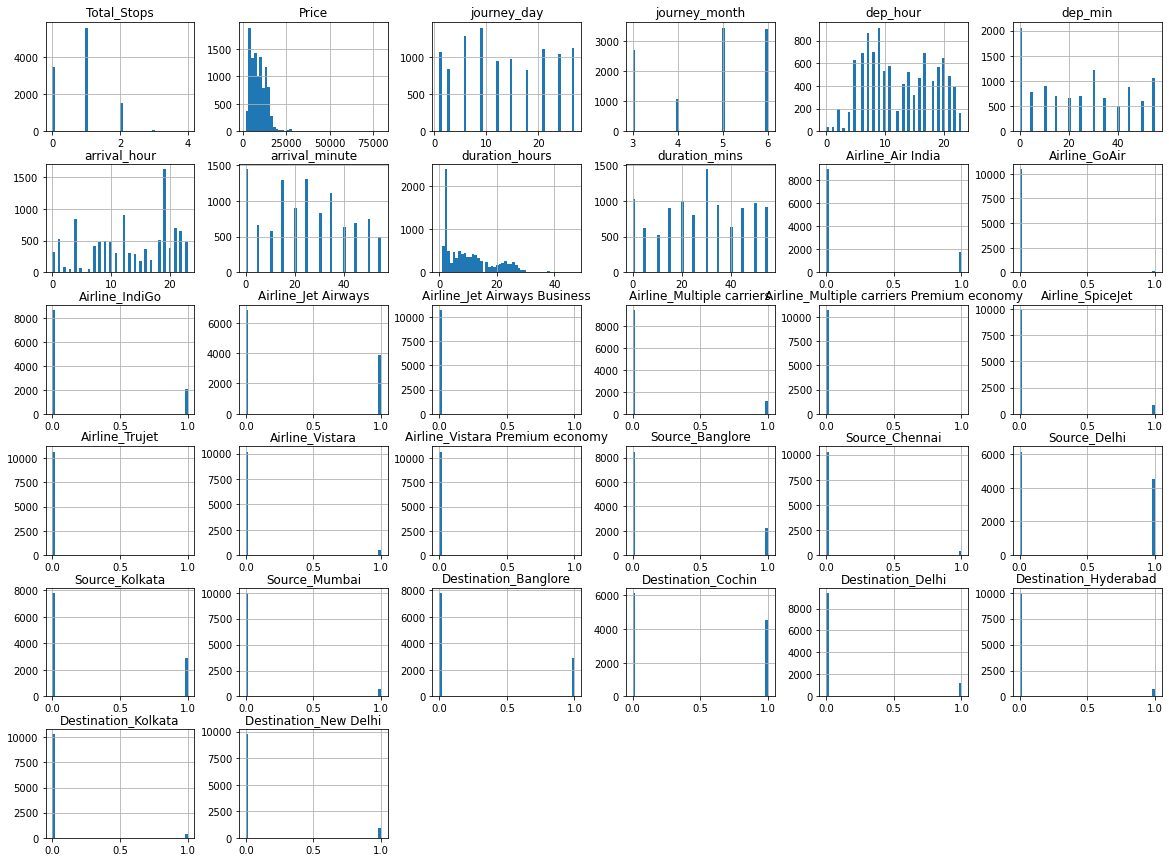

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

# Train-Test Splitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_set,test_set = train_test_split(df,test_size = 0.2 , random_state = 42)

In [55]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:8546
 Rows in test set:2137



In [56]:
# equal distribution of 0,1--------------using Stratified Sampling

In [57]:
#from sklearn.model_selection import StratifiedShuffleSplit

In [58]:
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

In [59]:
#for train_index,test_index in split.split(df,df['fuel-type'],df['drive-wheels']):
 #   strat_train_set= df.loc[train_index]
  #  strat_test_set= df.loc[test_index]

In [60]:
#for train_index,test_index in split.split(df,df['aspiration'],df['engine-location']):
 #       strat_train_set= df.loc[train_index]
  #      strat_test_set= df.loc[test_index]    

In [61]:
test_set

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6076,1,10844,18,5,5,45,18,15,12,30,...,0,0,1,0,1,0,0,0,0,0
3544,1,4959,3,6,10,35,19,35,9,0,...,0,1,0,0,0,1,0,0,0,0
7313,1,14781,1,5,14,5,19,50,5,45,...,0,0,1,0,1,0,0,0,0,0
5032,0,3858,24,5,14,45,17,5,2,20,...,1,0,0,0,0,0,0,0,1,0
2483,1,12898,21,5,22,50,4,25,5,35,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1,7408,27,6,8,0,21,0,13,0,...,0,1,0,0,0,1,0,0,0,0
9871,0,4622,6,3,17,15,19,45,2,30,...,0,0,1,0,1,0,0,0,0,0
10063,1,7452,21,4,7,55,22,25,14,30,...,0,1,0,0,0,1,0,0,0,0
7623,0,4823,9,4,8,30,11,20,2,50,...,0,0,0,0,0,0,1,0,0,0


In [62]:
test_set.describe()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,...,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,0.828732,9135.997660,13.194197,4.708470,12.493215,24.386991,13.326158,24.749649,10.421619,28.130557,...,0.035096,0.440337,0.261582,0.066448,0.261582,0.440337,0.116051,0.066448,0.035096,0.080487
std,0.677112,4601.507827,8.481540,1.169481,5.777481,18.916049,6.831974,16.588643,8.566744,16.634659,...,0.184065,0.496544,0.439599,0.249122,0.439599,0.496544,0.320360,0.249122,0.184065,0.272109
min,0.000000,1965.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5298.000000,6.000000,3.000000,8.000000,5.000000,8.000000,15.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8452.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,9.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,40.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,57209.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
df = train_set.copy()

# Looking For Correlations

In [64]:
corr_matrix = df.corr()

In [65]:
corr_matrix['Price'].sort_values(ascending=False)

Price                                        1.000000
Total_Stops                                  0.608427
duration_hours                               0.510731
Airline_Jet Airways                          0.413318
Destination_Cochin                           0.272429
Source_Delhi                                 0.272429
Airline_Jet Airways Business                 0.259659
Destination_New Delhi                        0.177529
Airline_Multiple carriers                    0.139109
Airline_Air India                            0.055644
arrival_hour                                 0.028476
Airline_Multiple carriers Premium economy    0.019830
Destination_Banglore                         0.015297
Source_Kolkata                               0.015297
Airline_Vistara Premium economy              0.000118
dep_hour                                    -0.000354
Airline_Trujet                              -0.011571
dep_min                                     -0.029850
Airline_Vistara             

# Plotting Graphs

In [66]:
from pandas.plotting import scatter_matrix
attributes = ["Price","Total_Stops","duration_hours"]

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Total_Stops', ylabel='Price'>,
        <AxesSubplot:xlabel='duration_hours', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>,
        <AxesSubplot:xlabel='Total_Stops', ylabel='Total_Stops'>,
        <AxesSubplot:xlabel='duration_hours', ylabel='Total_Stops'>],
       [<AxesSubplot:xlabel='Price', ylabel='duration_hours'>,
        <AxesSubplot:xlabel='Total_Stops', ylabel='duration_hours'>,
        <AxesSubplot:xlabel='duration_hours', ylabel='duration_hours'>]],
      dtype=object)

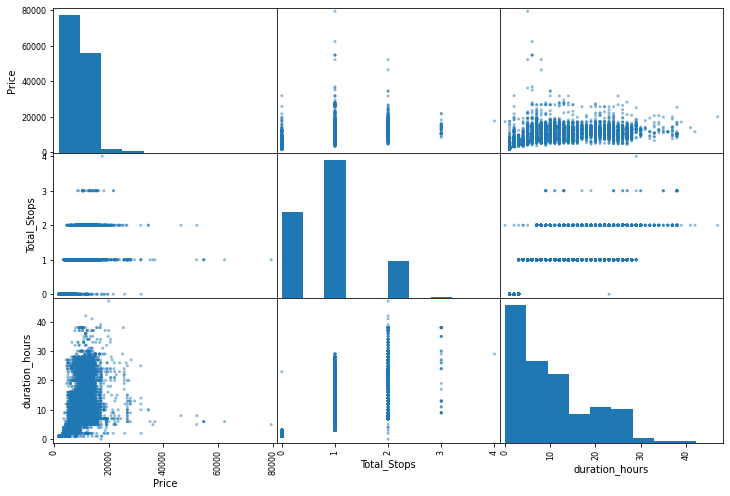

In [67]:
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

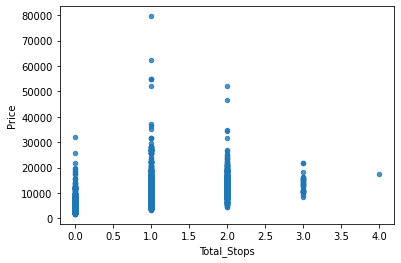

In [68]:
df.plot(kind="scatter",x="Total_Stops",y="Price",alpha=0.8)

# Splitting Features and Labels

In [69]:
df= train_set.drop("Price",axis=1)
df_labels = train_set["Price"].copy()

In [70]:
df.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8990,2,12,3,6,30,16,35,10,5,0,...,0,0,0,1,0,0,0,1,0,0
3684,1,9,5,11,30,12,35,25,5,0,...,0,1,0,0,0,1,0,0,0,0
1034,1,24,4,15,45,22,5,6,20,0,...,0,1,0,0,0,1,0,0,0,0
3909,1,21,3,12,50,1,35,12,45,0,...,0,1,0,0,0,1,0,0,0,0
3088,2,24,6,17,15,19,15,26,0,1,...,0,1,0,0,0,1,0,0,0,0


In [71]:
df_labels.head()

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
Name: Price, dtype: int64

# Create Pipeline

In [72]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [73]:
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('std_scaler',StandardScaler())])

In [74]:
df_num = my_pipeline.fit_transform(df)
df_num.shape

(8546, 31)

# Selecting a Desired MODEl for Project

In [75]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [76]:
model.fit(df_num,df_labels)

RandomForestRegressor()

In [77]:
some_data = df.iloc[:5]

In [78]:
some_labels = df_labels.iloc[:5]

# Check Predictions

In [79]:
prepared_data = my_pipeline.transform(some_data)

In [80]:
model.predict(prepared_data)

array([22978.96      , 12216.83333333,  5924.18      ,  8187.115     ,
       11958.81566667])

In [81]:
list(some_labels)

[23528, 12373, 5583, 7695, 11972]

In [82]:
# predictions are fine not best...

# Evaluating The Model

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
df_predictions = model.predict(df_num)

In [85]:
#lin_mse = mean_squared_error(df_labels,df_predictions)
mse = mean_squared_error(df_labels,df_predictions)

In [86]:
#lin_rmse = np.sqrt(lin_mse)
rmse = np.sqrt(mse)

In [87]:
#lin_rmse
rmse

982.0848888682083

# using Better Evaluation Technique--(CROSS_VALIDATION)

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
scores = cross_val_score(model,df_num,df_labels,scoring="neg_mean_squared_error",cv=10)

In [90]:
rmse_scores= np.sqrt(-scores)

In [91]:
rmse_scores

array([1793.40961499, 1874.52471086, 1875.93867314, 1959.22659586,
       2115.31876846, 2052.27195439, 2348.44151121, 2093.20434799,
       1969.36279421, 1867.24677928])

In [92]:
# Create a Function

In [93]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard_Deviation:",scores.std())

In [94]:
print_scores(rmse_scores)

Scores: [1793.40961499 1874.52471086 1875.93867314 1959.22659586 2115.31876846
 2052.27195439 2348.44151121 2093.20434799 1969.36279421 1867.24677928]
Mean: 1994.8945750381238
Standard_Deviation: 154.88964904456188


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 8990 to 7270
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                8546 non-null   int64
 1   journey_day                                8546 non-null   int64
 2   journey_month                              8546 non-null   int64
 3   dep_hour                                   8546 non-null   int64
 4   dep_min                                    8546 non-null   int64
 5   arrival_hour                               8546 non-null   int64
 6   arrival_minute                             8546 non-null   int64
 7   duration_hours                             8546 non-null   int64
 8   duration_mins                              8546 non-null   int64
 9   Airline_Air India                          8546 non-null   uint8
 10  Airline_GoAir                              85

## Saving the model

In [96]:
#import pickle
# open a file, where you ant to store the data
#file = open('flight_rf.pkl', 'wb')

# dump information to that file
#pickle.dump(model, file)

In [97]:
from joblib import dump,load
dump(model,'Flight.joblib')

['Flight.joblib']

## Testing the model on test data

In [98]:
X_test = test_set.drop("Price",axis=1)
Y_test = test_set["Price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[13769.11716667  5919.44       12175.42133333 ...  6589.65
  4841.98       11113.02      ] [10844, 4959, 14781, 3858, 12898, 10529, 16079, 7229, 3597, 16289, 3943, 15764, 14815, 6591, 5126, 2754, 4030, 6171, 15809, 4148, 2175, 4823, 7608, 14298, 14151, 5406, 3100, 13014, 10577, 8040, 5192, 14533, 4812, 9027, 4823, 13542, 9922, 13044, 7757, 4760, 4107, 3383, 14330, 6117, 8918, 5403, 9646, 14714, 22153, 8849, 9646, 10919, 8586, 7574, 17057, 8146, 7591, 6287, 10262, 6128, 16079, 9134, 4332, 10315, 16736, 10262, 7932, 6017, 14053, 10141, 5613, 9103, 15129, 3841, 4804, 8016, 4273, 8620, 13307, 11087, 5621, 7189, 4174, 7229, 13727, 7354, 3543, 15187, 14939, 7102, 3419, 8355, 10741, 13817, 4823, 8372, 4050, 12898, 13817, 8996, 8330, 10844, 6688, 7503, 26890, 4804, 4777, 7171, 5054, 15129, 10844, 10197, 7452, 7191, 13677, 11491, 15812, 3850, 7229, 8586, 13067, 4423, 2754, 6838, 4508, 9254, 3841, 4886, 5775, 10262, 5626, 7530, 11134, 10203, 8372, 13310, 3419, 13759, 8586, 7673, 12898, 11841, 67

In [99]:
final_rmse

2119.645502182721

In [100]:
prepared_data[0]

array([ 1.74435623, -0.18720791, -1.46907017, -1.13039148,  0.29805099,
        0.38532046,  0.62626302, -0.02385297, -1.37335569, -0.44281054,
       -0.13812827, -0.49080407,  1.33964063, -0.02419528, -0.35427438,
       -0.039032  , -0.28786929, -0.01081793, -0.21837834, -0.01081793,
       -0.51236736, -0.19270683, -0.85232895, -0.6089905 ,  3.79449578,
       -0.6089905 , -0.85232895, -0.36752918,  3.79449578, -0.19270683,
       -0.31242775])